# Exercises

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [2]:
# doubled n_samples because of splitting the dataset into training and testing
n = 200
X_sep,y_sep = make_blobs(n_samples=n,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.3,)
X_nsep,y_nsep = make_blobs(n_samples=n,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)

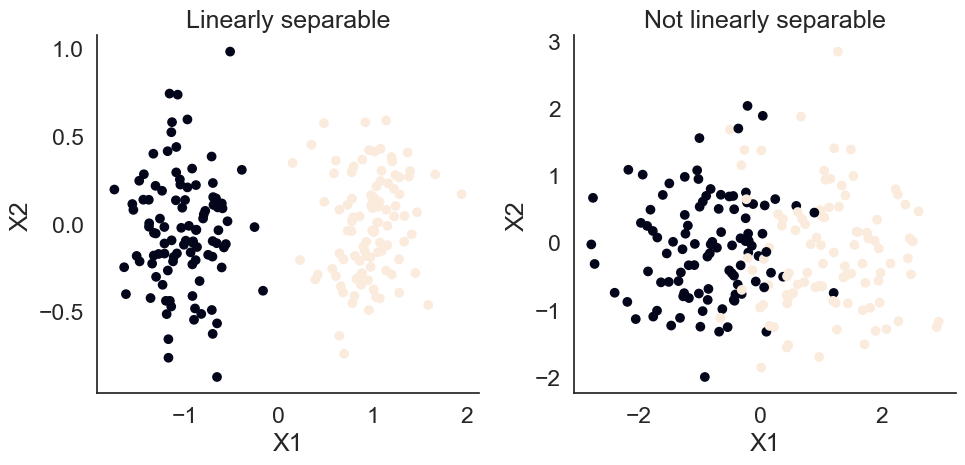

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Linearly separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X_sep[:,0],X_sep[:,1],c=y_sep)
plt.subplot(1,2,2)
plt.title('Not linearly separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)

plt.tight_layout()

In [4]:
np.linspace(-3,3,12)

array([-3.        , -2.45454545, -1.90909091, -1.36363636, -0.81818182,
       -0.27272727,  0.27272727,  0.81818182,  1.36363636,  1.90909091,
        2.45454545,  3.        ])

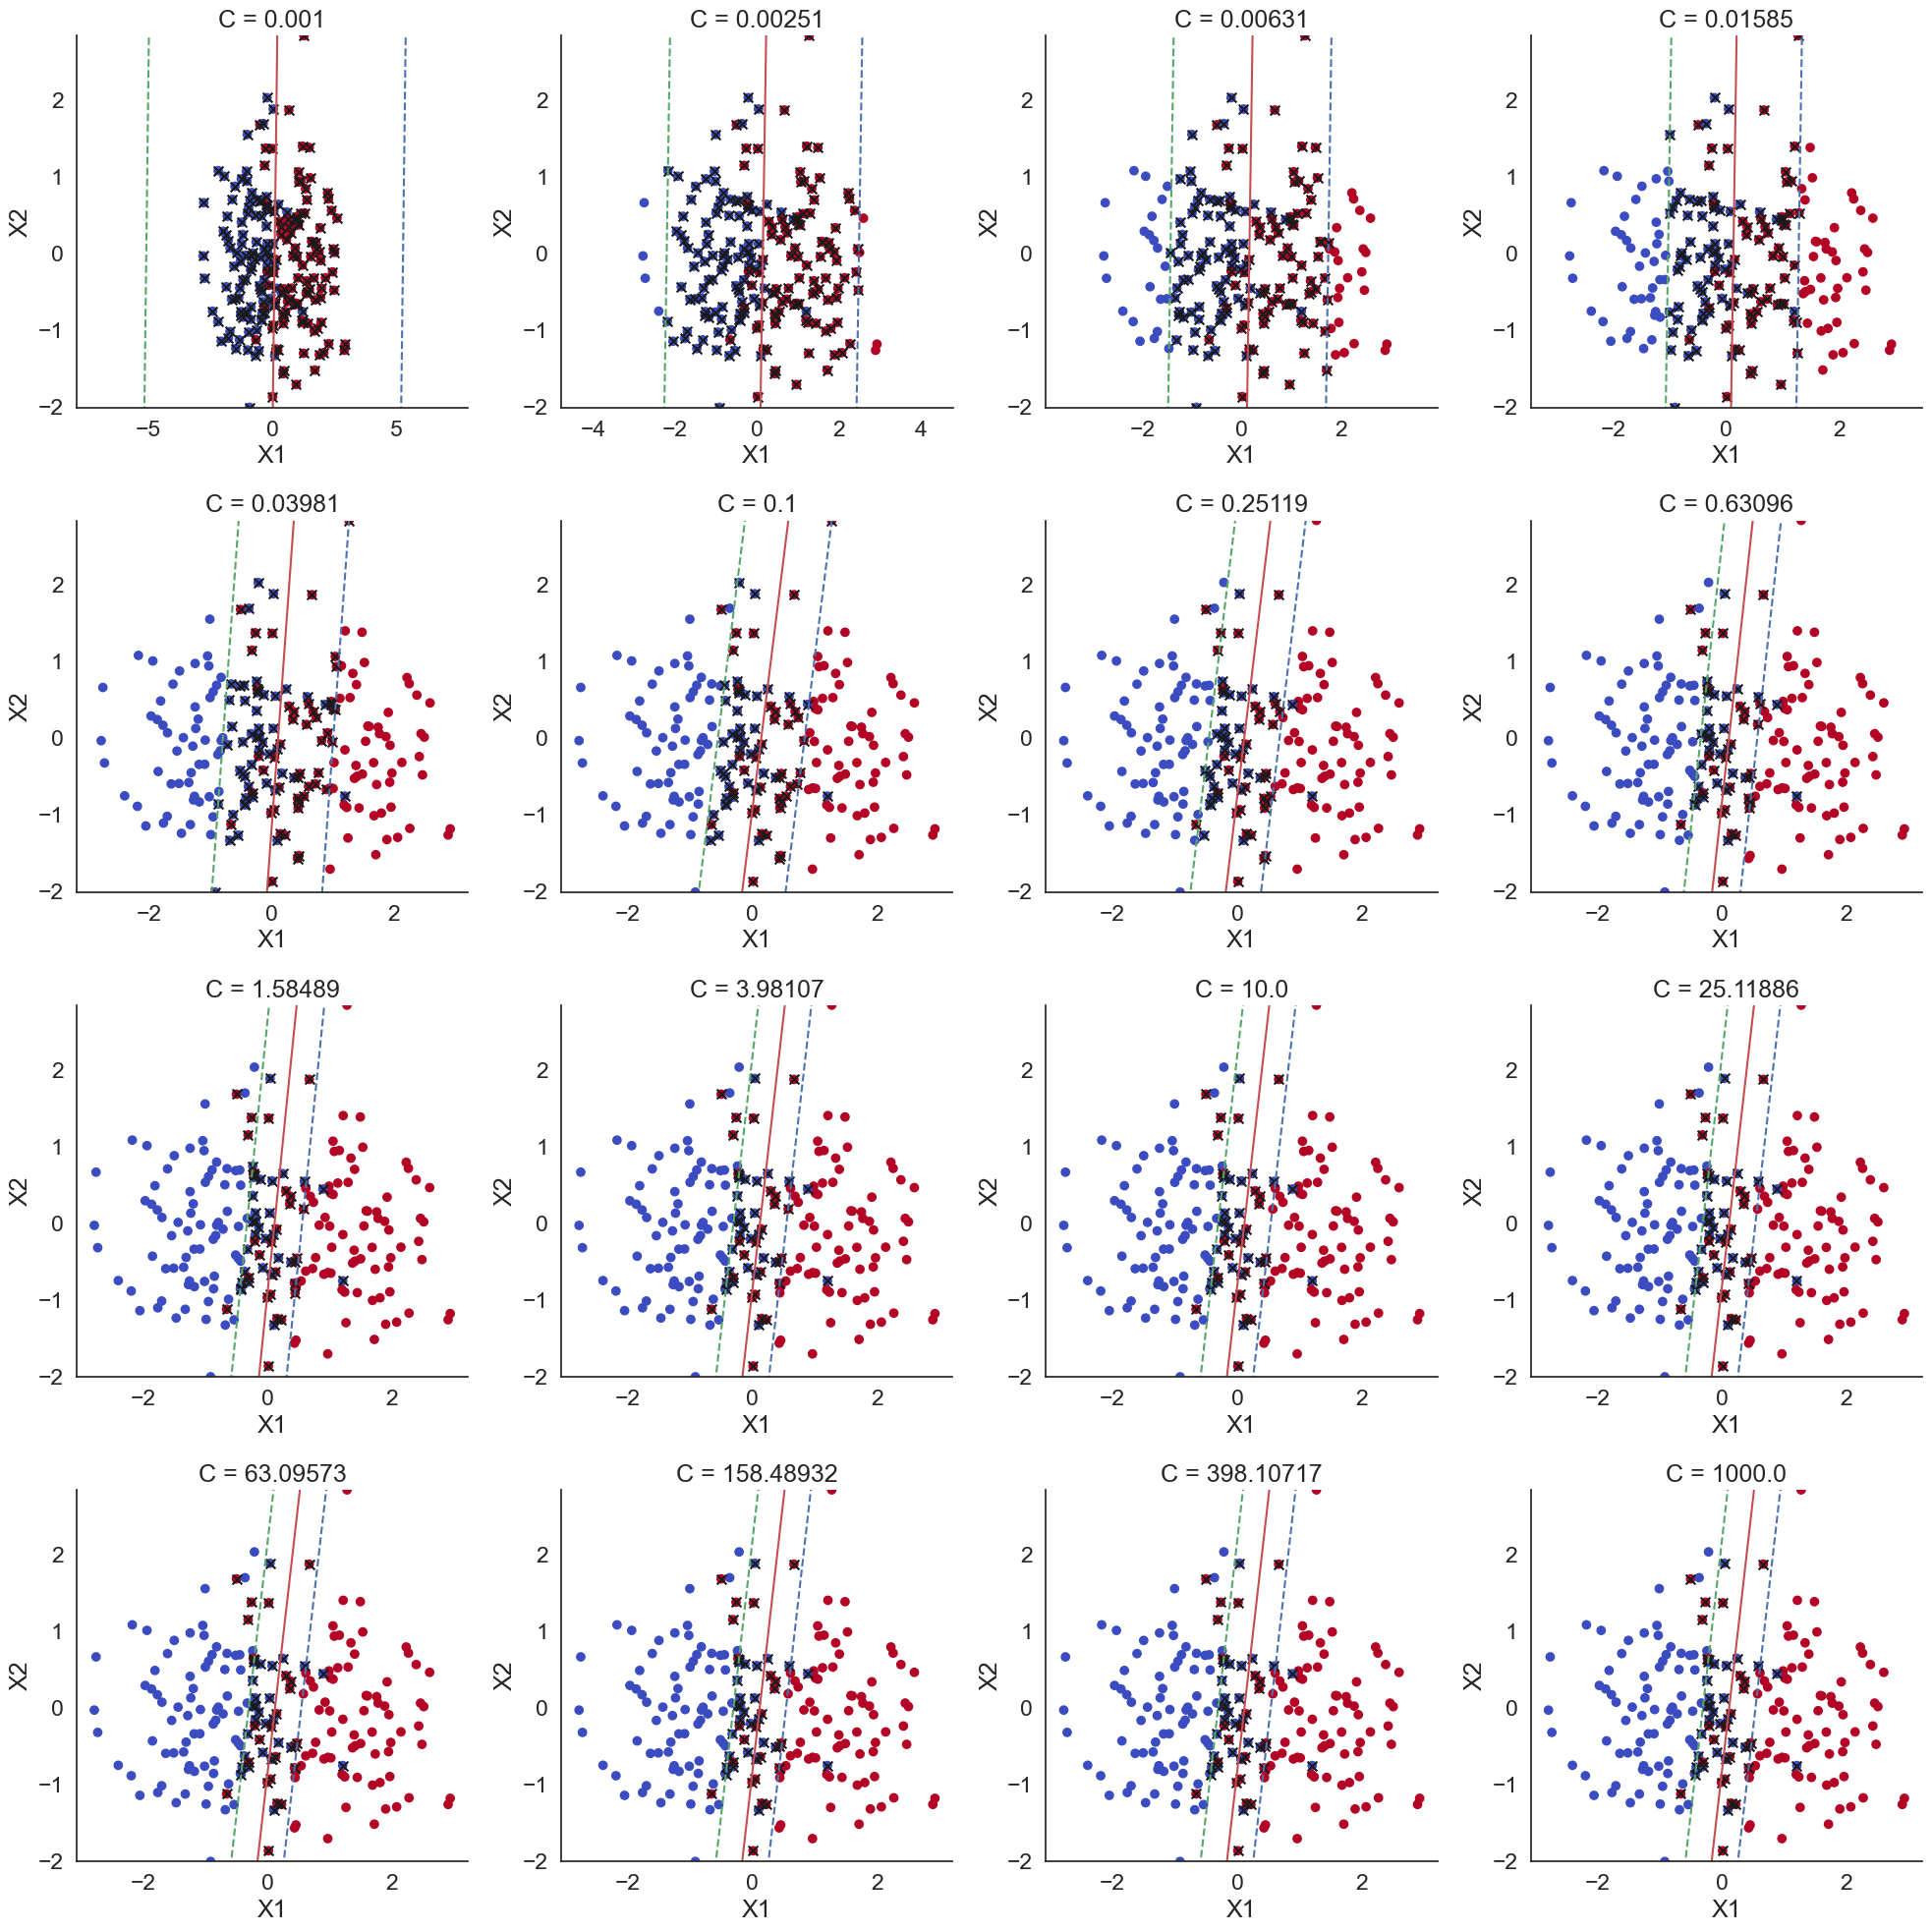

In [5]:
# Make function to plot SVM and return accuracies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def plot_svc(X, y, svc_model, ax):
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
    # Constructing a hyperplane using a formula.
    w = svc_model.coef_[0]
    b = svc_model.intercept_[0]
    x_points = np.linspace(-2, 2)
    y_points = -(w[0] / w[1]) * x_points - b / w[1]
    # Plotting a red hyperplane
    ax.plot(x_points, y_points, c='r')
    # Encircle support vectors
    ax.scatter(svc_model.support_vectors_[:, 0],
               svc_model.support_vectors_[:, 1], 
               s=50, 
               c='k',
               marker='x')
    # Step 2 (unit-vector):
    w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    ax.plot(points_of_line_above[:, 0], 
            points_of_line_above[:, 1], 
            'b--')
    # Green margin line below
    ax.plot(points_of_line_below[:, 0], 
            points_of_line_below[:, 1], 
            'g--')
    ax.set_ylim([min(X[:,1]), max(X[:,1])])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

    accuracy = (n-svc_model.support_vectors_.shape[0])/n
    return accuracy

X,y = X_nsep,y_nsep

accuracies = []
#cs = [0.001,0.01,0.05,0.1,0.2,0.5,1,10,100,1000,1000]
cs = 10**np.linspace(-3,3,16)

cols = 4
rows = (len(cs) + cols - 1)//cols

scale = 5
fig, axes = plt.subplots(rows, cols, figsize=(scale*cols,scale*rows))

axes = axes.flatten()

for i, c in enumerate(cs):
    svc_model = svm.SVC(kernel = 'linear', C=c)
    svc_model.fit(X,y)
    accuracy = plot_svc(X, y, svc_model, axes[i])
    # get the accuracy to quantify the number of successfully separated datapoints
    accuracies.append(accuracy)
    axes[i].set_title(f'C = {round(c,5)}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

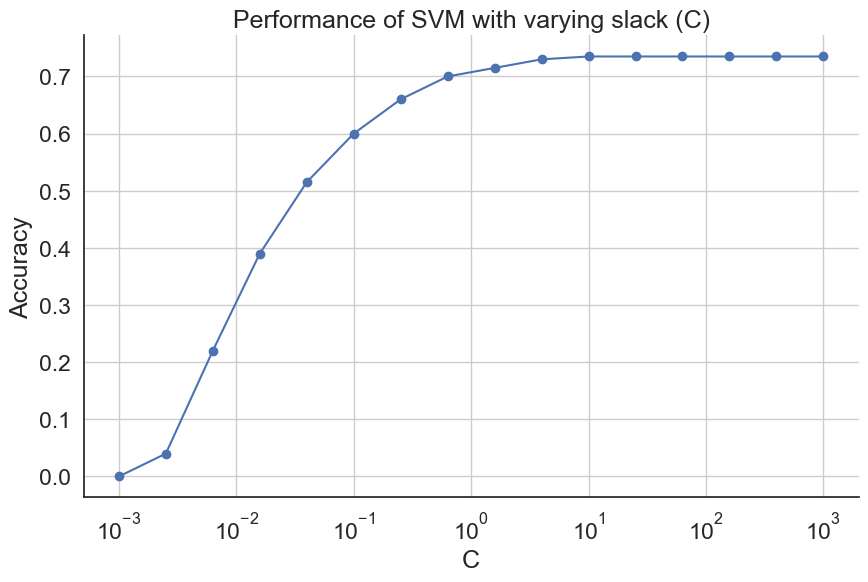

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(cs, accuracies, marker='o', linestyle='-')
plt.title('Performance of SVM with varying slack (C)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

## Useful code
---


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [60]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [63]:
# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



In [73]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
